# Explore here

In [1]:
# Your code here

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")
df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


## Trnasform the dates into a datetime object ##
This step is crucial as it will aloow us to extract important features of the data. Without the datetime object we would not be able to analyze the data as it evolves through time.

In [11]:
df["date"] = pd.to_datetime(df.date)
df = df.set_index("date")
df_sales = df["sales"]
df_sales.head()


date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: sales, dtype: float64

## Plot the time Series ##

/tmp/ipykernel_674/1578290863.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


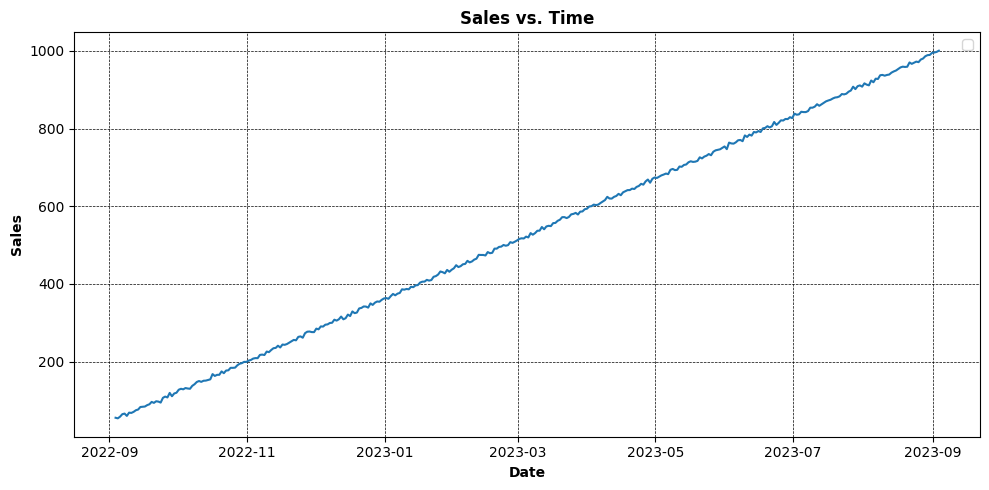

In [4]:
fig, axis = plt.subplots(figsize = (10,5))

sns.lineplot(data = df_sales)
plt.xlabel("Date",fontweight='bold')
plt.ylabel("Sales",fontweight='bold')
plt.title("Sales vs. Time",fontweight='bold')
plt.legend()
plt.tight_layout()
axis.grid(color='black',ls='dashed',lw=0.5)
plt.show()

## Analysis of the Time Series ##
Now we analyze common metrics relating to timeseries such:

* Trend: The overall trajectory of the time series. By inspection we can see that this toy dataset is increasing, although it becomes more difficult to ascertain with more complicated data.
* Seasonality: The highs and lows of the data and when do they occur. By inspection we can see some small fluctuations in the data.
* Variability: No obvious points of variability.
* Outliers: No obvious outliers.
* Inflection Points: No obvious inflection points.

For a more informed analysis we will use thhe seasonal decompose method in statsmodel.

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_sales,period=12)
decomposition

/tmp/ipykernel_674/2797470103.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


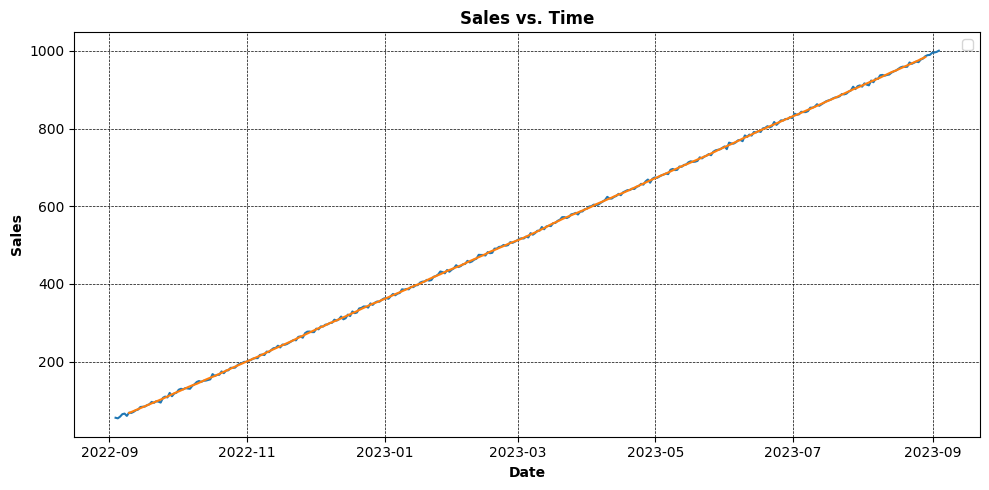

In [6]:
# Trend

trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10,5))

sns.lineplot(data = df_sales)
sns.lineplot(data = trend)
plt.xlabel("Date",fontweight='bold')
plt.ylabel("Sales",fontweight='bold')
plt.title("Sales vs. Time",fontweight='bold')
plt.legend()
plt.tight_layout()
axis.grid(color='black',ls='dashed',lw=0.5)
plt.show()


/tmp/ipykernel_674/392503680.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


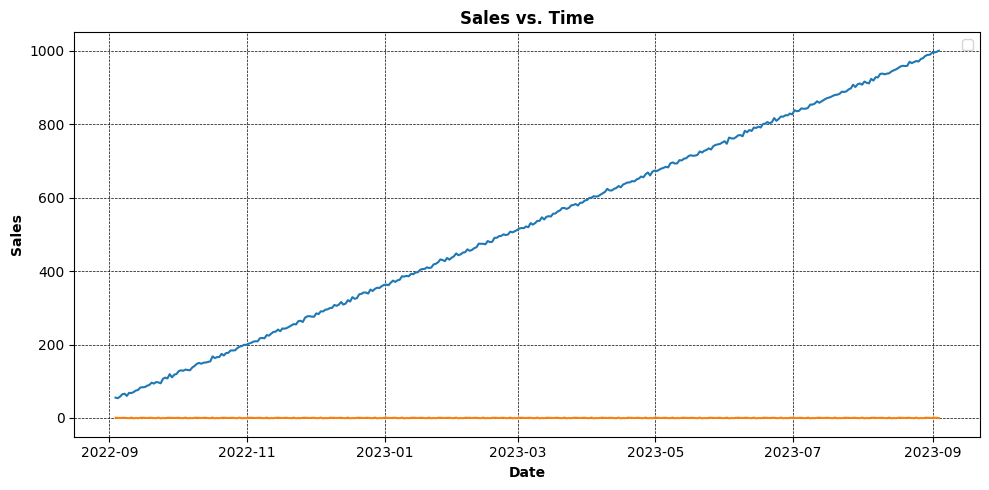

In [7]:
# Seasonality - whereas 'trend' refers to long term behavior, seasonality refers to short term highs and lows

seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10,5))

sns.lineplot(data = df_sales)
sns.lineplot(data = seasonal)
plt.xlabel("Date",fontweight='bold')
plt.ylabel("Sales",fontweight='bold')
plt.title("Sales vs. Time",fontweight='bold')
plt.legend()
plt.tight_layout()
axis.grid(color='black',ls='dashed',lw=0.5)
plt.show()




### Stationarity ###
The stationarity of the time series refers to wheter the time series will be repetitive over time, that is is the trend stochastic (random) or the mean and variance constant. To determine the stationarity of a time series a well known method in statistics is the Dickey Fuller test, which is a hypothesis test that takes 'stationary' as the null hypothesis.

In [8]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(df_sales)

Dickey-Fuller test results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

In [15]:
# Because our p-value is greater than 0.05 are null hypothesis is rejected. The series is therefore non-stationary.

### Variability ###

Variability has to do with residuals. This is the diffence between the observed values and actual values.

/tmp/ipykernel_956/80671528.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


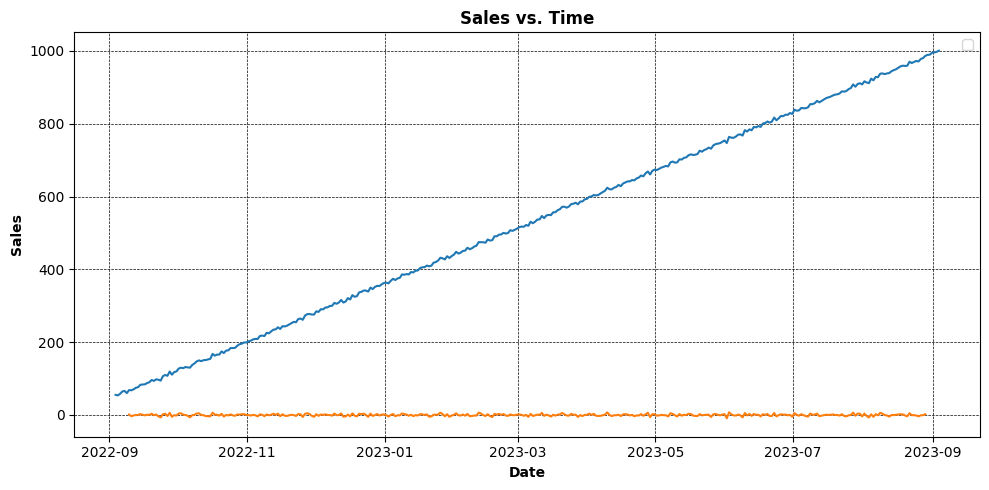

In [16]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10,5))

sns.lineplot(data = df_sales)
sns.lineplot(data = residual)
plt.xlabel("Date",fontweight='bold')
plt.ylabel("Sales",fontweight='bold')
plt.title("Sales vs. Time",fontweight='bold')
plt.legend()
plt.tight_layout()
axis.grid(color='black',ls='dashed',lw=0.5)
plt.show()




### Autocorrelation analysis ###
comparing the values of the data with previous values over time.

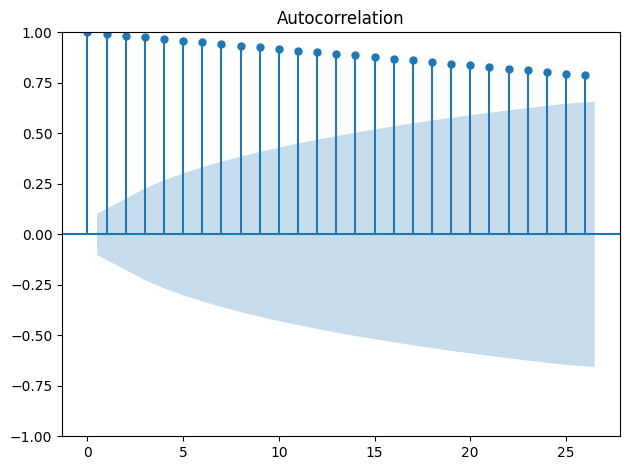

In [17]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_sales)

plt.tight_layout()

plt.show()

## Model Training ##


In [21]:
df_stationarity = df_sales.diff().dropna()
df_stationarity = df_stationarity.squeeze()  # Convert to Series if DataFrame has a single column

test_stationarity(df_stationarity)

Dickey-Fuller test results:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

In [27]:
df_sales

date
2022-09-03 17:10:08.079328      55.292157
2022-09-04 17:10:08.079328      53.803211
2022-09-05 17:10:08.079328      58.141693
2022-09-06 17:10:08.079328      64.530899
2022-09-07 17:10:08.079328      66.013633
                                 ...     
2023-08-30 17:10:08.079328     989.600354
2023-08-31 17:10:08.079328     994.987326
2023-09-01 17:10:08.079328     995.814415
2023-09-02 17:10:08.079328     997.350214
2023-09-03 17:10:08.079328    1000.482785
Name: sales, Length: 366, dtype: float64

In [9]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
#from fbprophet import Prophet
import math



In [ ]:
import math
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from colorama import Fore

## Split the data into training and validation.
y_train, y_valid = train_test_split(df_sales, train_size=0.7, shuffle=False)  # Shuffle=False for time series


model = ARIMA(y_train, order=(1,1,1))
model_fit = model.fit()

# Prediction with ARIMA
y_pred = model_fit.forecast(steps=len(y_valid))  # Ensure forecast length matches validation data

# Calculate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

# Print RMSE
print(Fore.GREEN + 'RMSE: {:.4f}'.format(score_rmse))


/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RMSE: 3.2028


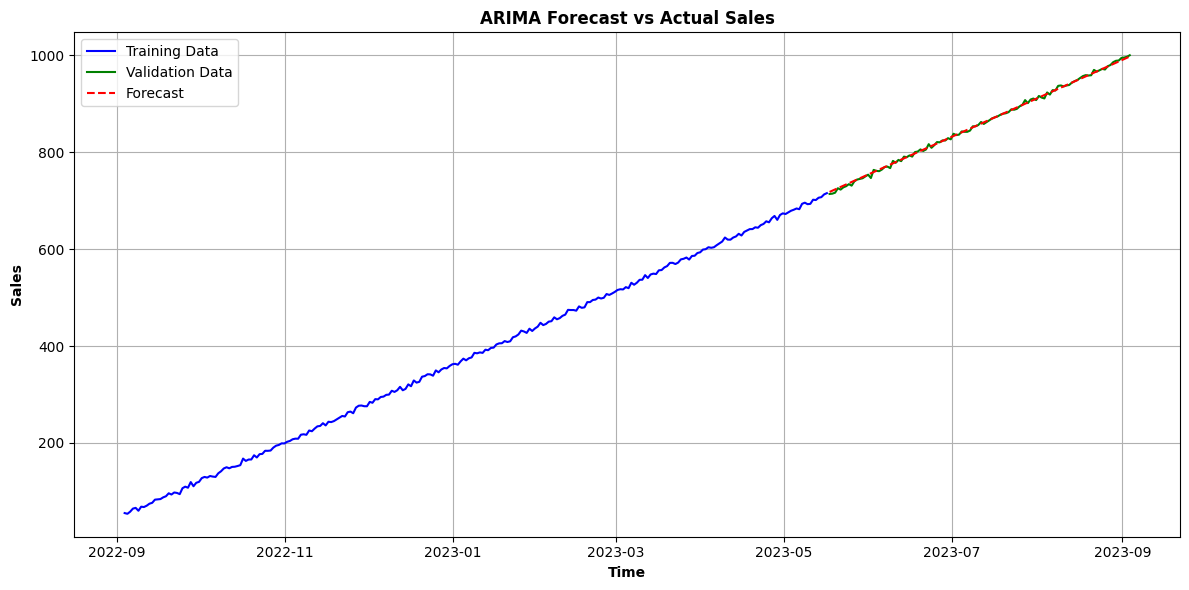

In [16]:
plt.figure(figsize=(12,6))

# Plot training data
plt.plot(y_train.index, y_train, label="Training Data", color="blue")

# Plot validation data (actual values)
plt.plot(y_valid.index, y_valid, label="Validation Data", color="green")

# Plot forecasted values
plt.plot(y_valid.index, y_pred, label="Forecast", color="red", linestyle="dashed")

# Labels and title
plt.xlabel("Time",fontweight='bold')
plt.ylabel("Sales",fontweight='bold')
plt.title("ARIMA Forecast vs Actual Sales",fontweight='bold')
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()